# Итоговое задание

# Содержание <a class="toc" id="toc"></a>
1. [Постановка задачи](#chap1)
2. [Анализ и проверка данных](#chap2)
3. [Сравнение методов решения задачи](#chap3)
    - [Линейная регрессия](#chap3_1)
    - [Функция для изучения поведения модели за пределами заданных значений](#chap3_11)
    - [MLPRegressor](#chap3_2)
    - [Поиск параметров сети через GridSearchCV](#chap3_3)
    - [Случайный лес](#chap3_4)
    - [Сравнение полученных метрик](#chap3_5)
    - [Проверяем полученные модели через кросс-валидацию](#chap3_6)
4. [Выводы по теоретической части](#chap4)
5. [Описание программного решения](#chap5)



## Постановка задачи <a class="anchor" id="chap1"></a>
### Прогнозирование размеров сварного шва при электронно-лучевой сварке тонкостенных конструкций аэрокосмического назначения

В качестве исходных данных были взяты результаты экспериментальных исследований, проводимых в целях улучшения технологического процесса электронно-лучевой сварки изделия, сборка которого состоит из элементов, состоящих из
разнородного материала.

Установка электронно-лучевой сварки, на которой проводились исследования, предназначена для сварки электронным лучом в глубоком вакууме деталей сборочных единиц из нержавеющих сталей, титановых, алюминиевых и специальных сплавов. 

Существующая установка электронно-лучевой сварки обеспечивает повторяемость режимов в рамках возможностей реализованной системы управления. Работы по сварке выполнялись на образцах-имитаторах, соответствующих технологическому изделию.

Для уменьшения вложения энергии при сварке:
1. Снижалась величина сварочного тока (IW);
2. Увеличивался ток фокусировки электронного пучка (IF);
3. Увеличивалась скорость сварки (VW);
4. Менялось расстояние от поверхности образцов до электронно-оптической системы (FP).

По совокупности параметров технологических режимов обеспечивались минимально возможные размеры сварных швов: глубина шва (Depth) и ширина шва (Width).

В процессе выполнения работ была произведена электронно-лучевая сварка 18-ти единиц образцов. Результаты металлографического контроля по размерам сварного шва для каждого образца проводились в 4-х поперечных сечениях сварного шва. Ускоряющее напряжение было постоянным в диапазоне 19,8 – 20 кВ. Набор полученных данных собраны в составе режимов сварки, размеров сварочных швов в поперечных сечениях всех образцов.

__Требуется:__ провести прогнозирование глубины (Depth) и ширины (Width) сварного шва в зависимости от параметров технологического процесса (IW, IF, VW, FP).


[К содержанию](#toc)

## Дополнительно
На практике интереснее наверное обратная задача, определить, какие параметры надо 
установить, чтобы получить шов с нужными параметрами.
Скорость сварки и расстояние менять скорее всего не очень удобно так что можно зафиксировать 
их средними значениями и определить ток сварки и фокусировки, который треуется для задания тока.

## Дополнительные требования (удалить)
 
 1. Предварительная обработка датасета.
 2. Применение минимум 3-х алгоритмов машинного обучения (включая обязательно использование искусственных нейронных сетей) в Jupyter Notebook (или colab) позволяющих решить поставленную задачу анализа данных, выбрать лучшую модель и применить ее в приложении.
 3. Создание локального репозитория git.
 4. Реализация приложения. Приложение может быть консольное, оконное или веб-приложение по выбору.
 5. Создание профиля на github.com
 6. Выгрузка коммитов приложения из локального репозитория на github.com.

## Обработка,  проверка и анализ данных <a class="anchor" id="chap2"></a>


In [1]:
# загружаем необходимые для этой части библиотеки
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

### Загрузка данных, поиск пропусков

In [2]:
# Путь к файлу с данными - относительно файла блокнота
!ls ../../data/raw

ebw_data.csv  ebw_description.docx


In [3]:
# Загружаем данные из файла cvs (размещен в папке проекта)
df = pd.read_csv('../../data/raw/ebw_data.csv')
df

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48
...,...,...,...,...,...,...
67,44,146,9.0,60,1.20,1.72
68,45,146,9.0,60,1.36,1.76
69,45,146,9.0,60,1.28,1.76
70,45,146,9.0,60,1.28,1.76


In [4]:
#проверяем корректно ли применились типы данных
df.dtypes

IW         int64
IF         int64
VW       float64
FP         int64
Depth    float64
Width    float64
dtype: object

In [5]:
#проверяем общую статистику
df.describe()

,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


In [6]:
#проверяем на пропуски
df.isna().sum()

IW       0
IF       0
VW       0
FP       0
Depth    0
Width    0
dtype: int64

Загружены данные корректно, пропусков нет

### Визуализация данных, проверка на выбросы

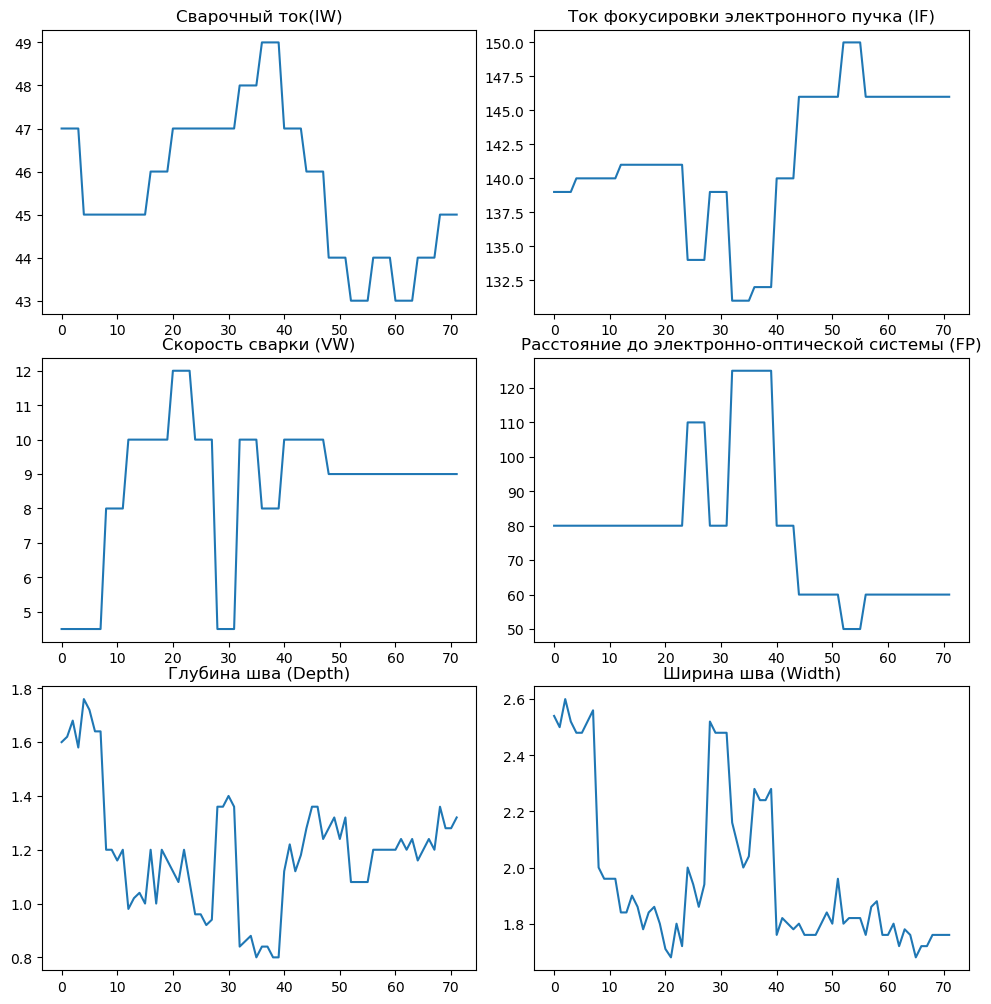

In [7]:
#построим гистограммы распределения для входных и выходных переменных
fig, ((IW, IF), (VW, FP), (Depth, Width))  = plt.subplots(ncols=2, nrows=3,figsize=(10,10))
fig.tight_layout() 
IW.set_title('Сварочный ток(IW)')
IW.plot(df.IW)
IF.set_title('Ток фокусировки электронного пучка (IF)')
IF.plot(df.IF)
VW.set_title('Cкорость сварки (VW)')
VW.plot(df.VW)
FP.set_title('Расстояние до электронно-оптической системы (FP)')
FP.plot(df.FP)
Depth.set_title('Глубина шва (Depth)')
Depth.plot(df.Depth)
Width.set_title('Ширина шва (Width)')
Width.plot(df.Width)
plt.show()

 Явных аномальных значений в выборке не выявлено
 
 [К содержанию](#toc)

### Корреляции данных, диаграммы

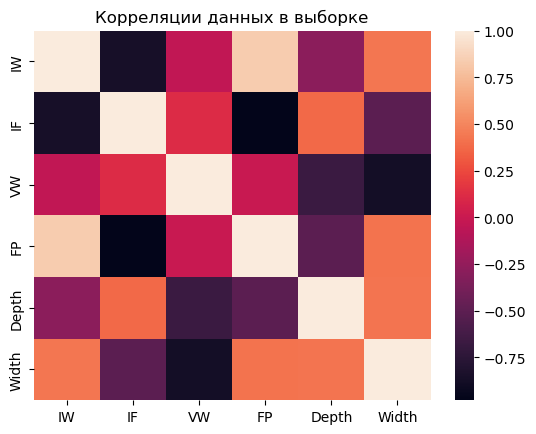

In [8]:
#построим heatmap
sns.heatmap(df.corr()).set_title('Корреляции данных в выборке')
plt.show()

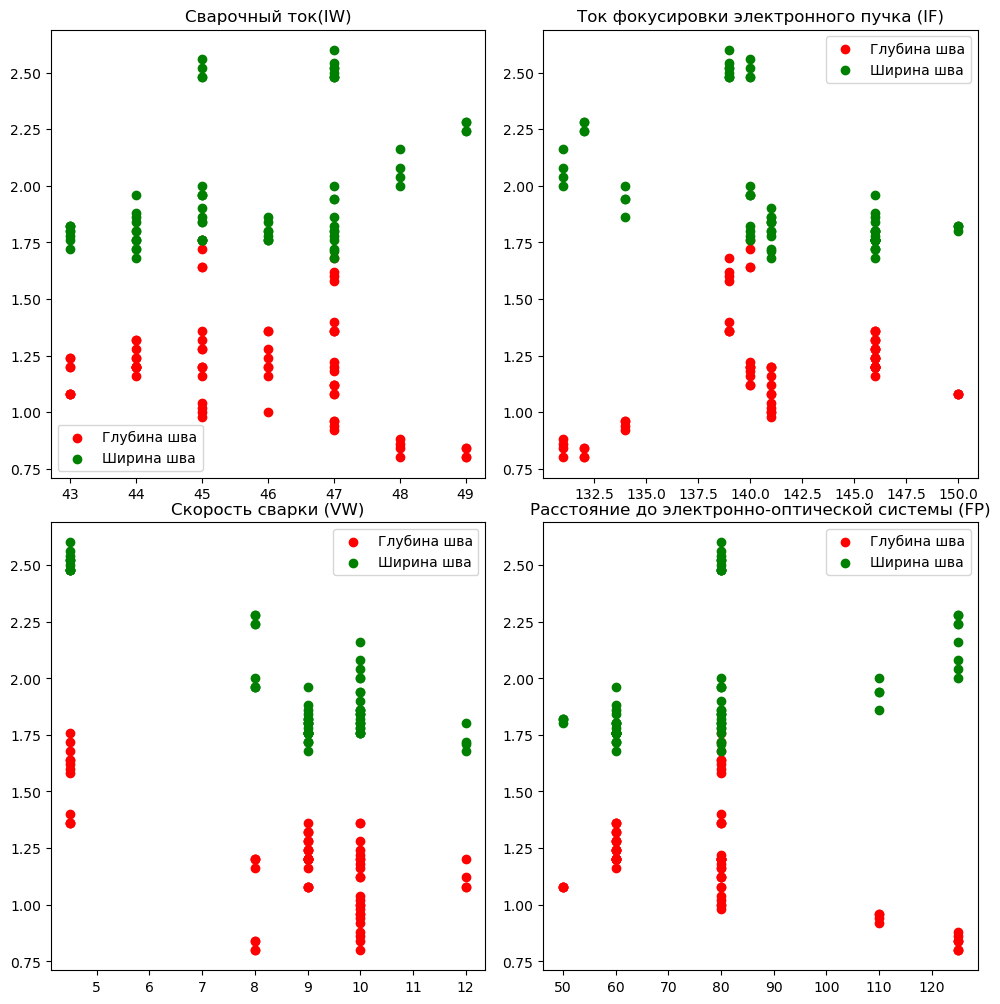

In [14]:
#построим диаграммы зависимостей  выходных параметров от каждого входа
fig, ((IW, IF), (VW, FP))  = plt.subplots(ncols=2, nrows=2,figsize=(10,10))
fig.tight_layout() 
#IW.set_title('Сварочный ток(IW)')
IW.scatter(x=df.IW, y=df.Depth, c='r')
IW.scatter(x=df.IW, y=df.Width, c='g')
IW.set_title('Сварочный ток(IW)')
IW.legend(['Глубина шва','Ширина шва'])

IF.scatter(x=df.IF, y=df.Depth, c='r')
IF.scatter(x=df.IF, y=df.Width, c='g')
IF.set_title('Ток фокусировки электронного пучка (IF)')
IF.legend(['Глубина шва','Ширина шва'])

VW.scatter(x=df.VW, y=df.Depth, c='r')
VW.scatter(x=df.VW, y=df.Width, c='g')
VW.set_title('Cкорость сварки (VW)')
VW.legend(['Глубина шва','Ширина шва'])

FP.scatter(x=df.FP, y=df.Depth, c='r')
FP.scatter(x=df.FP, y=df.Width, c='g')
FP.set_title('Расстояние до электронно-оптической системы (FP)')
FP.legend(['Глубина шва','Ширина шва'])
plt.show()

Если брать по одному фактору, характер зависимости выходных параметров от каждой из входных переменных понять сложно

Построим попарные графики 

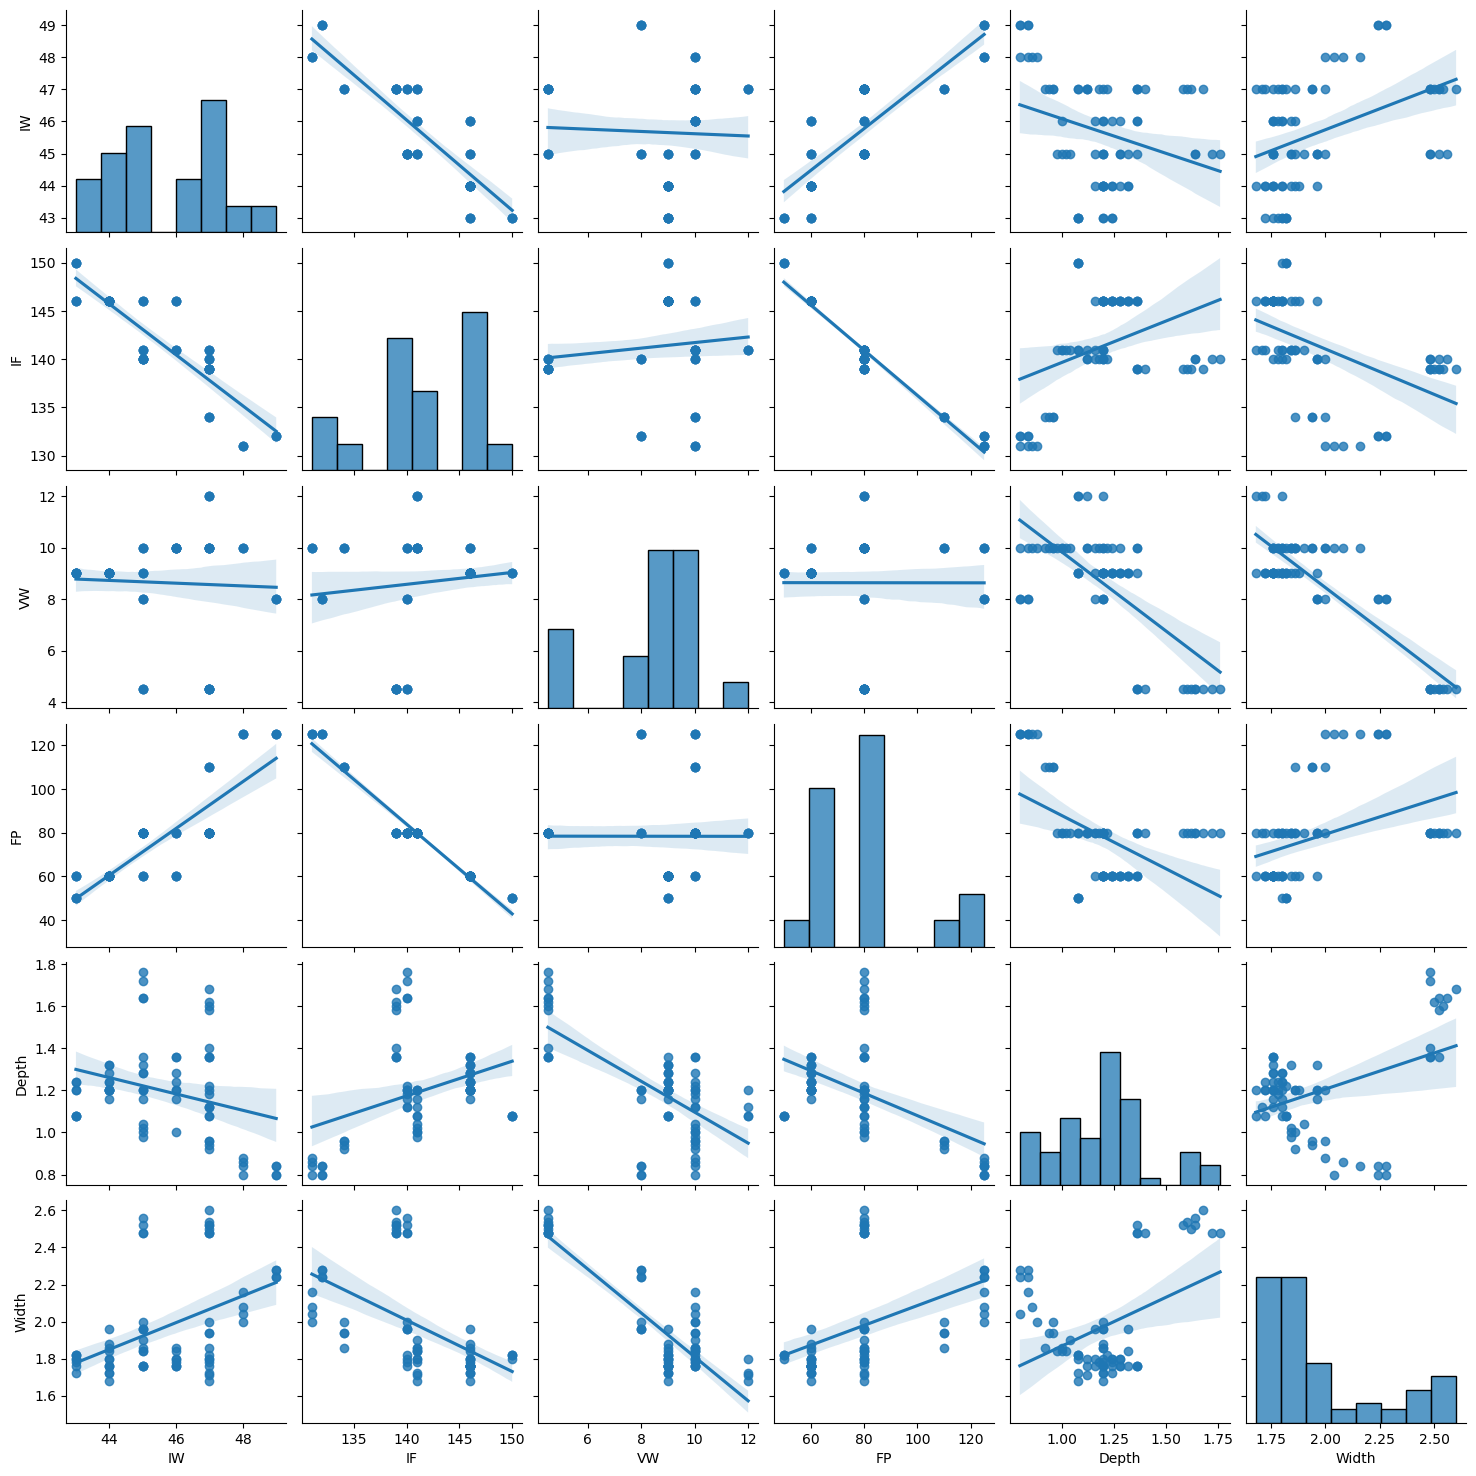

In [15]:
sns.pairplot(df, kind='reg')

[К содержанию](#toc)

## Сравнение методов решения задачи <a class="anchor" id="chap3"></a>


Необходимо решить задачу регрессии. 
Рассмотрим следующие способы решения:
- линейная регрессия 1-го порядка и полиноминальная
- полносвзанная нейронная сеть
-случайный лес

Проверку эффективности методов будем проводить с использованием sklearn

In [10]:
#Импортируем нужные методы
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [11]:
#определяем функцию для вывода различных метрик качества модели
def out_metrics(y_train, y_test, y_pred_train, y_pred_test):
    ret = [0,0]
    mse = mean_squared_error(y_true=y_train, y_pred=y_pred_train)
    mae = mean_absolute_error(y_true=y_train, y_pred=y_pred_train)
    mape = mean_absolute_percentage_error(y_true=y_train, y_pred=y_pred_train)
    ret[0] = (mse,mae,mape)
    print(f'Для тренировочной выборки: MSE {mse} - , MAE - {mae} , MAPE - {mape} ')
    mse = mean_squared_error(y_true=y_test, y_pred=y_pred_test)
    mae = mean_absolute_error(y_true=y_test, y_pred=y_pred_test)
    mape = mean_absolute_percentage_error(y_true=y_test, y_pred=y_pred_test)
    ret[1] = (mse,mae,mape)
    print(f'Для тестовой выборки: MSE {mse} - , MAE - {mae} , MAPE - {mape} ')
    fig, ((Depth,Width),(Depth_t,Width_t)) = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
    Depth.set_title('Глубина шва (train)')
    Depth.scatter([i for i in range(0,len(y_train[:,0]))], y_train[:,0], c='b')
    Depth.plot([i for i in range(0,len(y_pred_train[:,0]))], y_pred_train[:,0], c='g')
    Depth.legend(['Измерения','Предсказания'])
    Width.set_title('Ширин шва (train)')
    Width.scatter([i for i in range(0,len(y_train[:,1]))], y_train[:,1], c='b')
    Width.plot([i for i in range(0,len(y_pred_train[:,1]))], y_pred_train[:,1], c='g')
    Width.legend(['Измерения','Предсказания'])
    Depth_t.set_title('Глубина шва (test)')
    Depth_t.scatter([i for i in range(0,len(y_test[:,0]))], y_test[:,0], c='b')
    Depth_t.plot([i for i in range(0,len(y_pred_test[:,0]))], y_pred_test[:,0], c='g')
    Depth_t.legend(['Измерения','Предсказания'])
    Width_t.set_title('Ширин шва (test)')
    Width_t.scatter([i for i in range(0,len(y_test[:,1]))], y_test[:,1], c='b')
    Width_t.plot([i for i in range(0,len(y_pred_test[:,1]))], y_pred_test[:,1], c='g')
    Width_t.legend(['Измерения','Предсказания'])
    plt.show()
    return ret

In [12]:
#получаем выходы, исходные данные у нас в переменной df
df1 = df.copy()
out = df1.loc[:,['Depth','Width']]
df1 = df1.drop(columns=['Depth','Width'])
x_train, x_test, y_train, y_test = train_test_split(df1.values, out.values)
X, y = shuffle(df1.values, out.values)

### Линейная регрессия <a class="anchor" id="chap3_1"></a>

In [13]:
#составляем pipeline для линейной регрессии
linear1 = make_pipeline(LinearRegression())
linear_poly_2 = make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
linear_poly_3 = make_pipeline(PolynomialFeatures(degree=3),LinearRegression())
linear_poly_8 = make_pipeline(PolynomialFeatures(degree=8),LinearRegression())

Для тренировочной выборки: MSE 0.007293557437085877 - , MAE - 0.06518164871881196 , MAPE - 0.04524396425779686 
Для тестовой выборки: MSE 0.0068116939266788384 - , MAE - 0.06797654543573647 , MAPE - 0.04297903390098071 


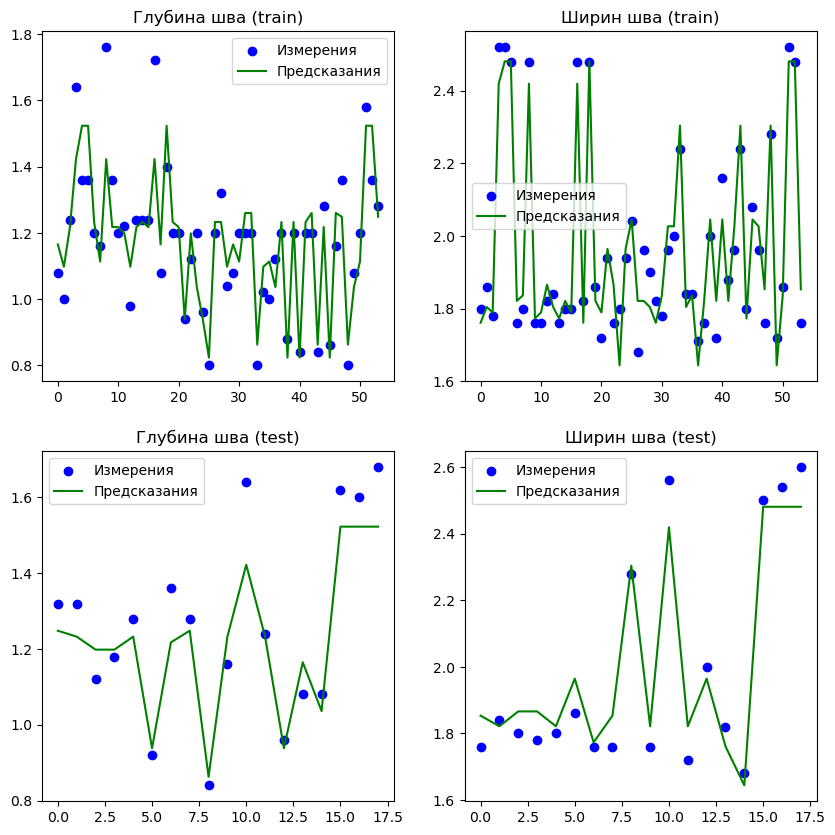

In [14]:
metrics = {}
m = linear1
m.fit(x_train, y_train)
y_pred_train = m.predict(x_train)
y_pred_test = m.predict(x_test)
metrics['LinearRegression'] = out_metrics(y_train, y_test, y_pred_train, y_pred_test);

In [15]:
df.describe()

,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


### Функция для изучения поведения модели за пределами заданных значений  <a class="anchor" id="chap3_11"></a>

Изучаем поведение модели за пределами имеющегося диапазона значений


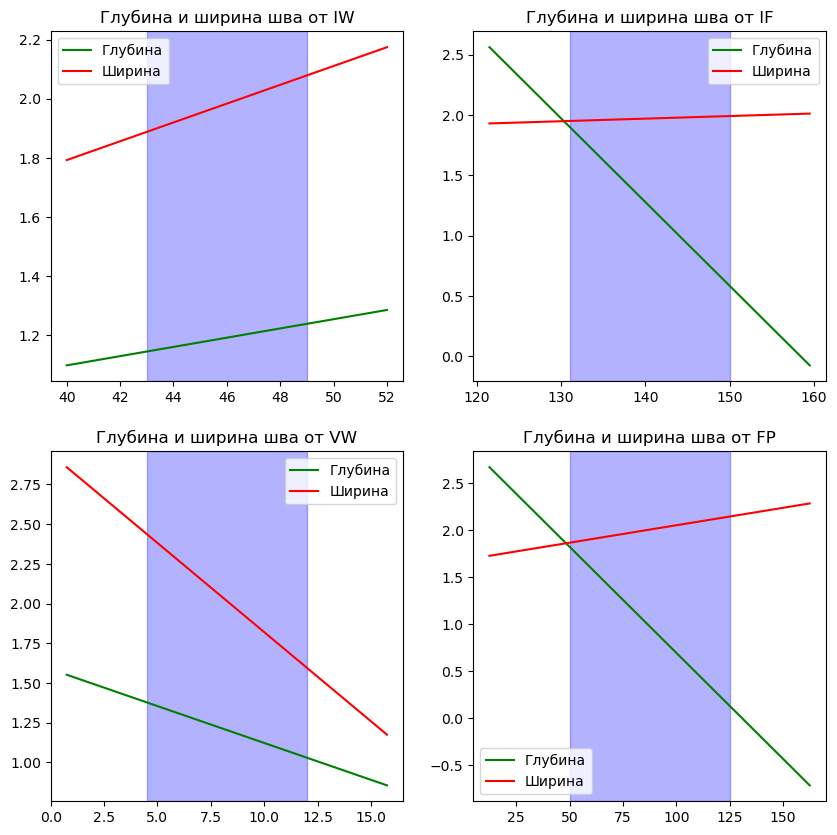

In [16]:
#функция для изучния поведения модели за пределами значений в заданном диапазон
def plot_extra(mo,df):
    print('Изучаем поведение модели за пределами имеющегося диапазона значений')
    d = {}
    fig, ((d['IW'], d['IF']), (d['VW'], d['FP'])) = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
    prop = ('IW','IF','VW','FP')
    for val in prop:
        ar = np.zeros((200,4))
        ar[:, prop.index(val)] = np.linspace(df[val].min()-(df[val].max()-df[val].min())*0.5, 
                                             df[val].max()+(df[val].max()-df[val].min())*0.5, num=200)
        for med_val in prop:
            if med_val != val:
                ar[:, prop.index(med_val)] = df[med_val].mean()
        y_pred = m.predict(ar)
        d[val].set_title(f'Глубина и ширина шва от {val}')
        d[val].plot(ar[:,prop.index(val)], y_pred[:,0], c='g')
        d[val].plot(ar[:,prop.index(val)], y_pred[:,1], c='r')
        d[val].axvspan(df[val].min(), df[val].max(), color="blue", alpha=0.3)
        d[val].legend(['Глубина','Ширина'])
        #print(ar)

plot_extra(m, df)

Для тренировочной выборки: MSE 0.0019754629629620585 - , MAE - 0.03176234567921028 , MAPE - 0.021903371329223445 
Для тестовой выборки: MSE 0.006334953703899745 - , MAE - 0.05308333333452564 , MAPE - 0.03382667249337996 


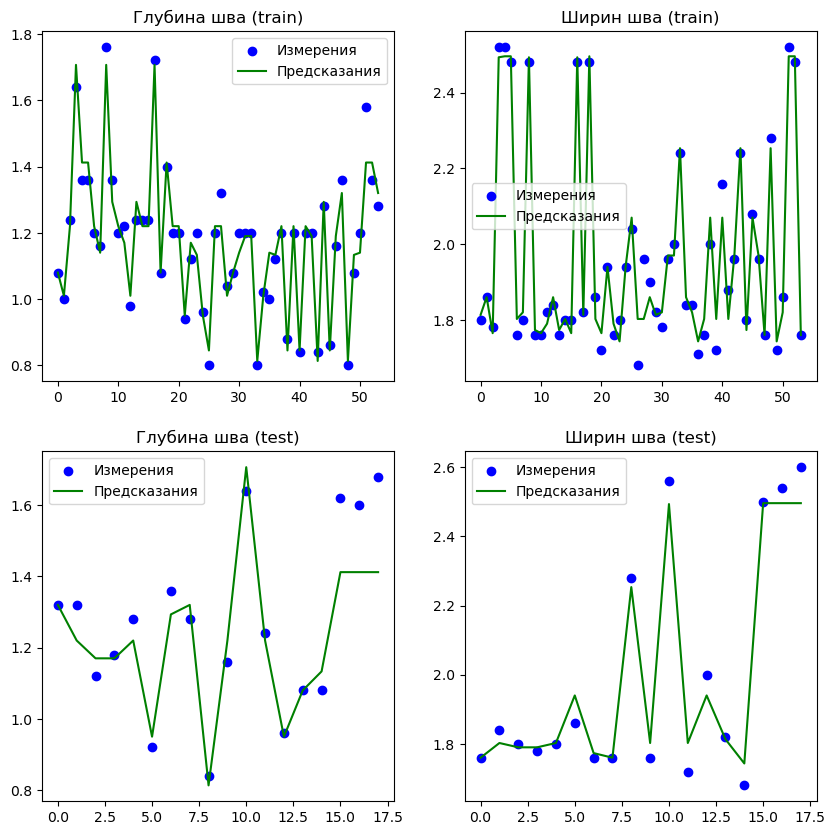

In [17]:
m = linear_poly_2
m.fit(x_train, y_train)
y_pred_train = m.predict(x_train)
y_pred_test = m.predict(x_test)
metrics['LinearRegression_poly_2'] = out_metrics(y_train, y_test, y_pred_train, y_pred_test);

Изучаем поведение модели за пределами имеющегося диапазона значений


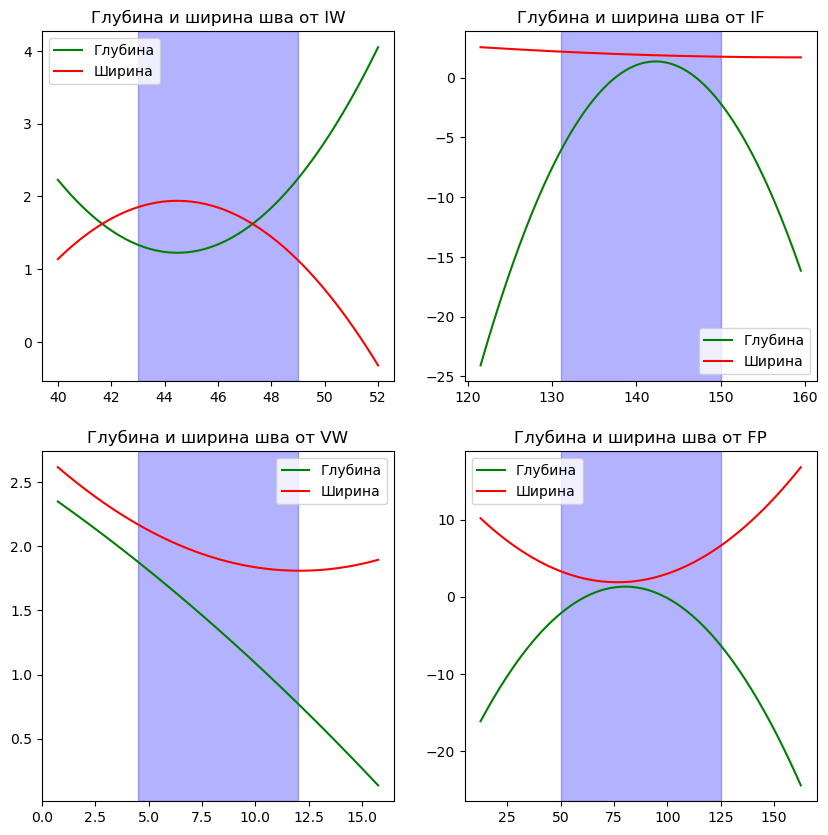

In [18]:
plot_extra(m, df)

Для тренировочной выборки: MSE 0.0019765522969738716 - , MAE - 0.031803701895254624 , MAPE - 0.021927808209688177 
Для тестовой выборки: MSE 0.0063598222616480515 - , MAE - 0.053364348941379126 , MAPE - 0.034020268335364534 


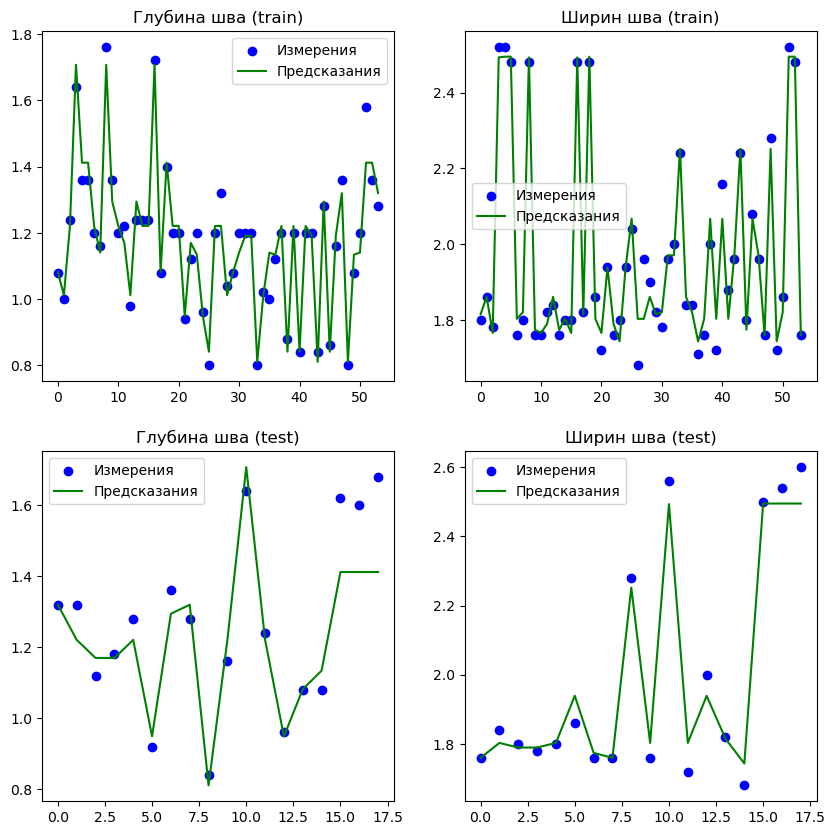

In [19]:
m = linear_poly_3
m.fit(x_train, y_train)
y_pred_train = m.predict(x_train)
y_pred_test = m.predict(x_test)
metrics['LinearRegression_poly_3'] = out_metrics(y_train, y_test, y_pred_train, y_pred_test);

Изучаем поведение модели за пределами имеющегося диапазона значений


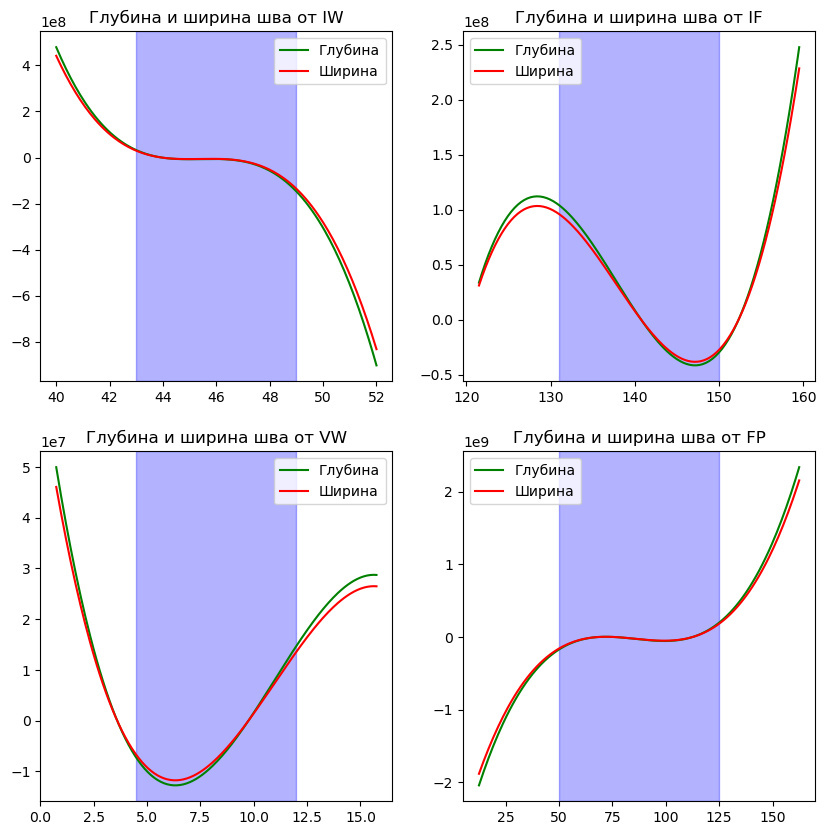

In [20]:
plot_extra(m, df)

Для тренировочной выборки: MSE 0.0019998647811259856 - , MAE - 0.03219725608825684 , MAPE - 0.0221794951879785 
Для тестовой выборки: MSE 0.006229024709240824 - , MAE - 0.05335818343692357 , MAPE - 0.034199811720445325 


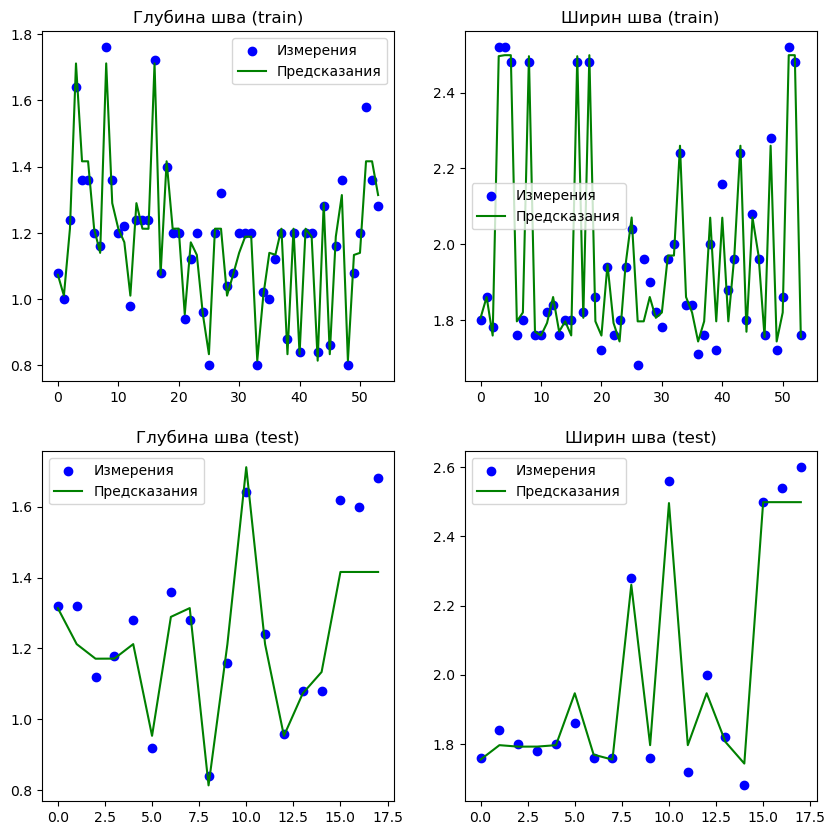

In [21]:
m = linear_poly_8
m.fit(x_train, y_train)
y_pred_train = m.predict(x_train)
y_pred_test = m.predict(x_test)
metrics['LinearRegression_poly_8'] = out_metrics(y_train, y_test, y_pred_train, y_pred_test);

Изучаем поведение модели за пределами имеющегося диапазона значений


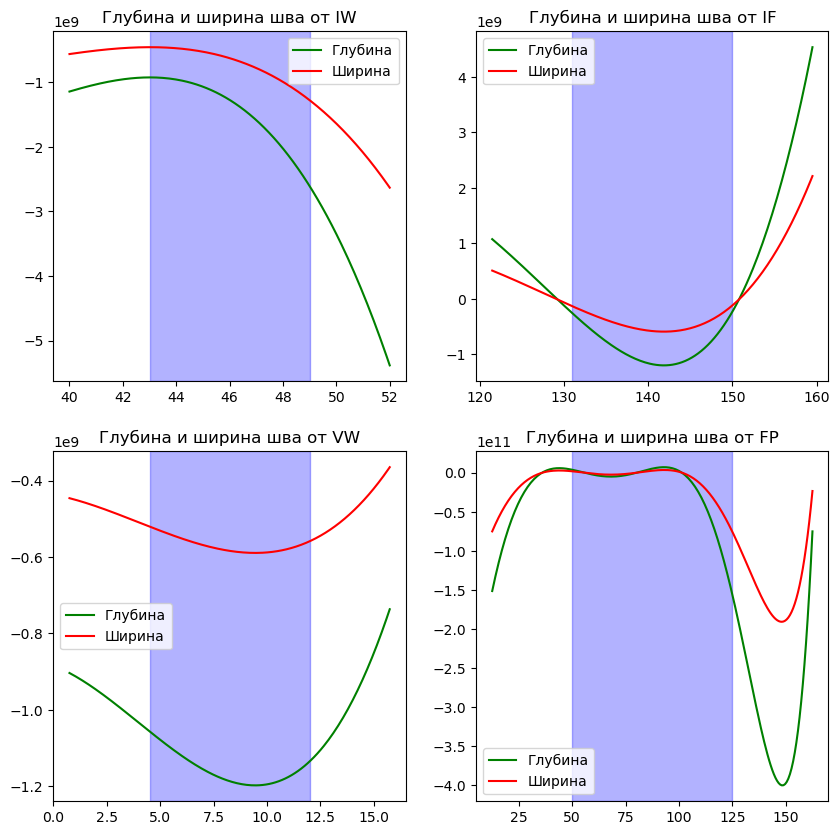

In [22]:
plot_extra(m, df)

[К содержанию](#toc)

__Вывод:__ применения линейной регрессии для данной задачи дает хорошие результаты. Оптимальным видится применение регрессии 2 или 3 порядка, дальше точность практически не растет

[К содержанию](#toc)

### Полносвязаннная нейросеть <a class="anchor" id="chap3_2"></a>

In [23]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, Normalizer

In [24]:
#Создаем несколько архитектур
nreg_1 = make_pipeline(StandardScaler(),Normalizer(),MLPRegressor(hidden_layer_sizes=(4),max_iter=50000, 
                                                                  tol=1e-9, verbose=0, 
                                                                  random_state=34))
nreg_2 = make_pipeline(StandardScaler(),Normalizer(),MLPRegressor(hidden_layer_sizes=(10), max_iter=50000, 
                                                                  tol=1e-9, verbose=0,  
                                                                  random_state=34))
nreg_3 = make_pipeline(StandardScaler(),Normalizer(),MLPRegressor(hidden_layer_sizes=(4,4),max_iter=50000, 
                                                                  tol=1e-9, verbose=0,  
                                                                  random_state=34))
nreg_4 = make_pipeline(StandardScaler(),Normalizer(),MLPRegressor(hidden_layer_sizes=(10,10),max_iter=50000, 
                                                                  tol=1e-9, verbose=0,  
                                                                  random_state=34))

Для тренировочной выборки: MSE 0.0062651972832232505 - , MAE - 0.06100921367656466 , MAPE - 0.04522630194375769 
Для тестовой выборки: MSE 0.007978078208605946 - , MAE - 0.06877321187582938 , MAPE - 0.04838276507166528 


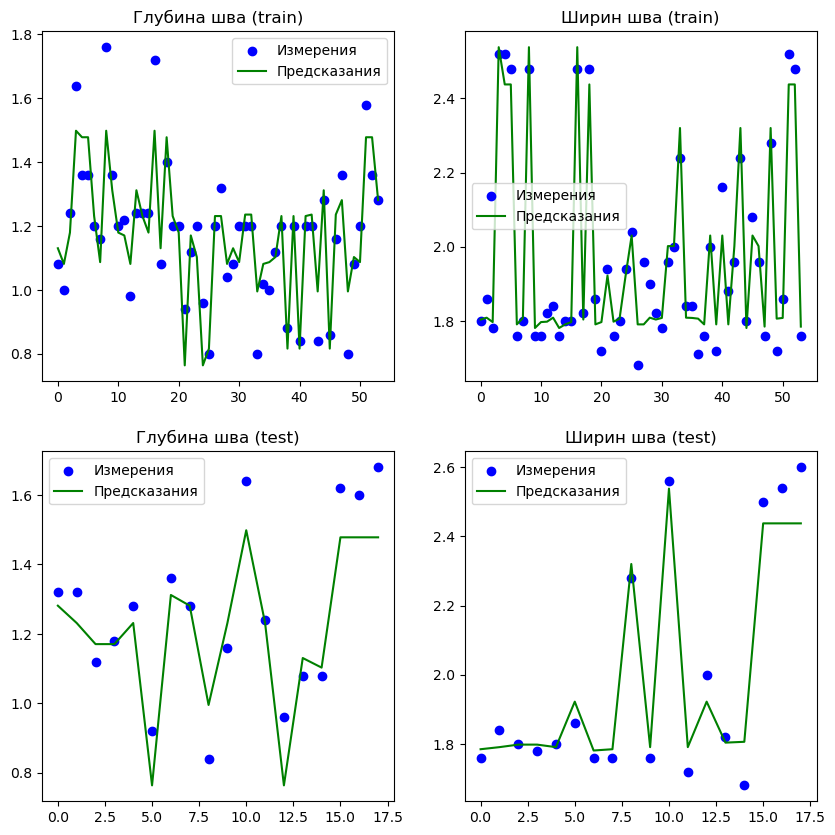

In [25]:
m = nreg_1
m.fit(x_train, y_train)
y_pred_train = m.predict(x_train)
y_pred_test = m.predict(x_test)
metrics['MLPRegressor (4)'] = out_metrics(y_train, y_test, y_pred_train, y_pred_test);

Изучаем поведение модели за пределами имеющегося диапазона значений


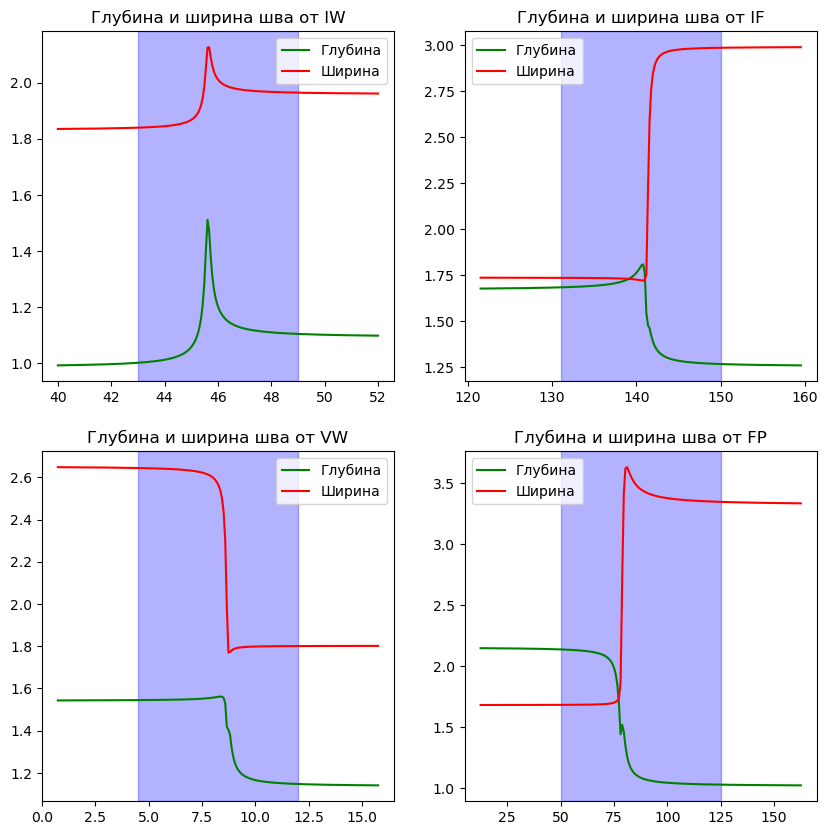

In [26]:
plot_extra(m, df)

Для тренировочной выборки: MSE 0.0021862055125838305 - , MAE - 0.03447434902291781 , MAPE - 0.023629044549721215 
Для тестовой выборки: MSE 0.006605480560757875 - , MAE - 0.054932515502137715 , MAPE - 0.035054160033703485 


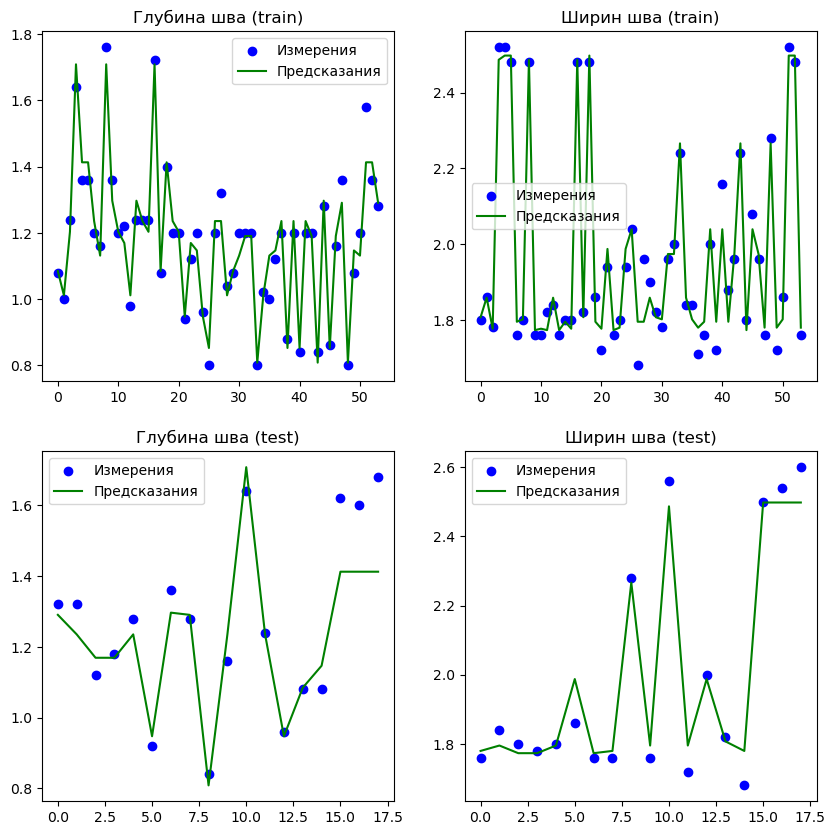

In [27]:
m = nreg_2
m.fit(x_train, y_train)
y_pred_train = m.predict(x_train)
y_pred_test = m.predict(x_test)
metrics['MLPRegressor (10)'] = out_metrics(y_train, y_test, y_pred_train, y_pred_test);

Для тренировочной выборки: MSE 0.004627506087973402 - , MAE - 0.054930370837538434 , MAPE - 0.039081062611000014 
Для тестовой выборки: MSE 0.009064386299524916 - , MAE - 0.07375948443492031 , MAPE - 0.048346100365766094 


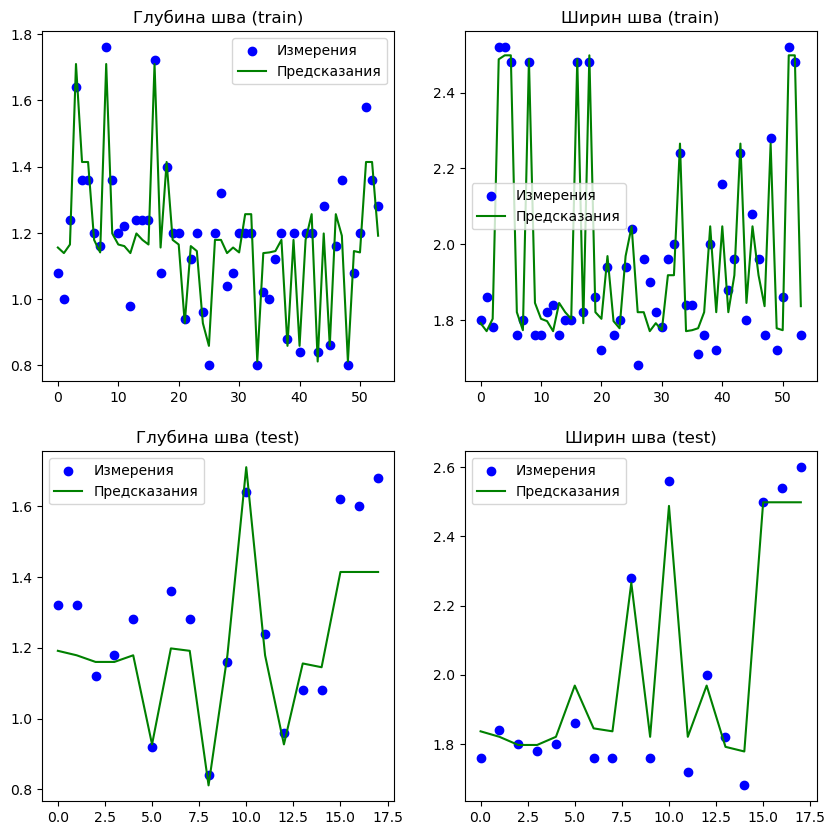

In [28]:
m = nreg_3
m.fit(x_train, y_train)
y_pred_train = m.predict(x_train)
y_pred_test = m.predict(x_test)
metrics['MLPRegressor (4,4)'] = out_metrics(y_train, y_test, y_pred_train, y_pred_test);

Изучаем поведение модели за пределами имеющегося диапазона значений


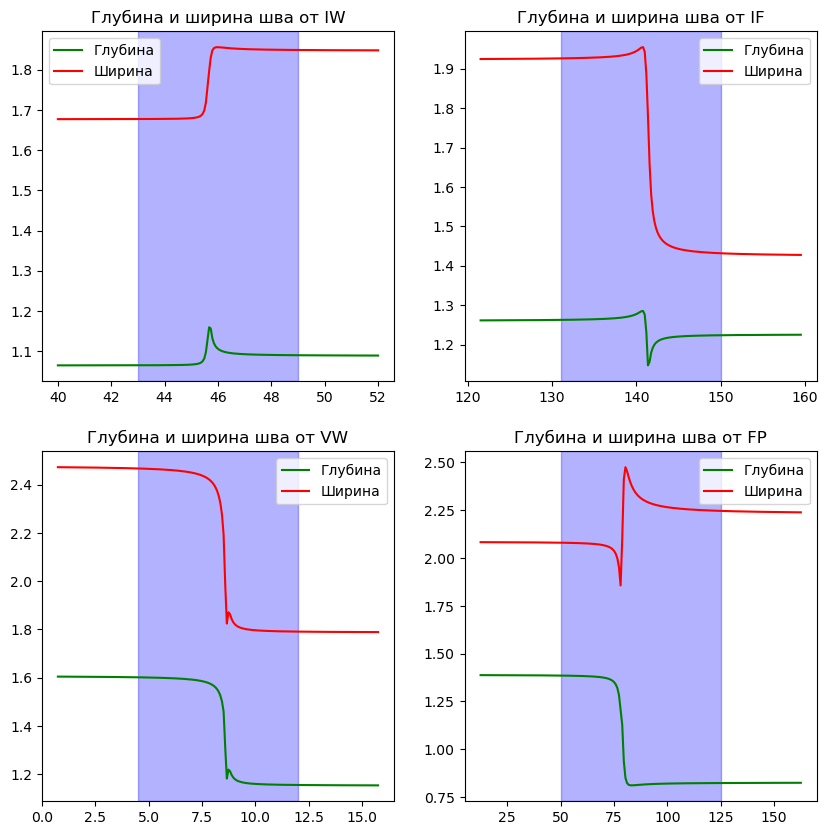

In [29]:
plot_extra(m, df)

Для тренировочной выборки: MSE 0.001983555182923682 - , MAE - 0.03235634610527833 , MAPE - 0.022304397275453025 
Для тестовой выборки: MSE 0.006353579690696699 - , MAE - 0.05359076339137933 , MAPE - 0.034148825060308585 


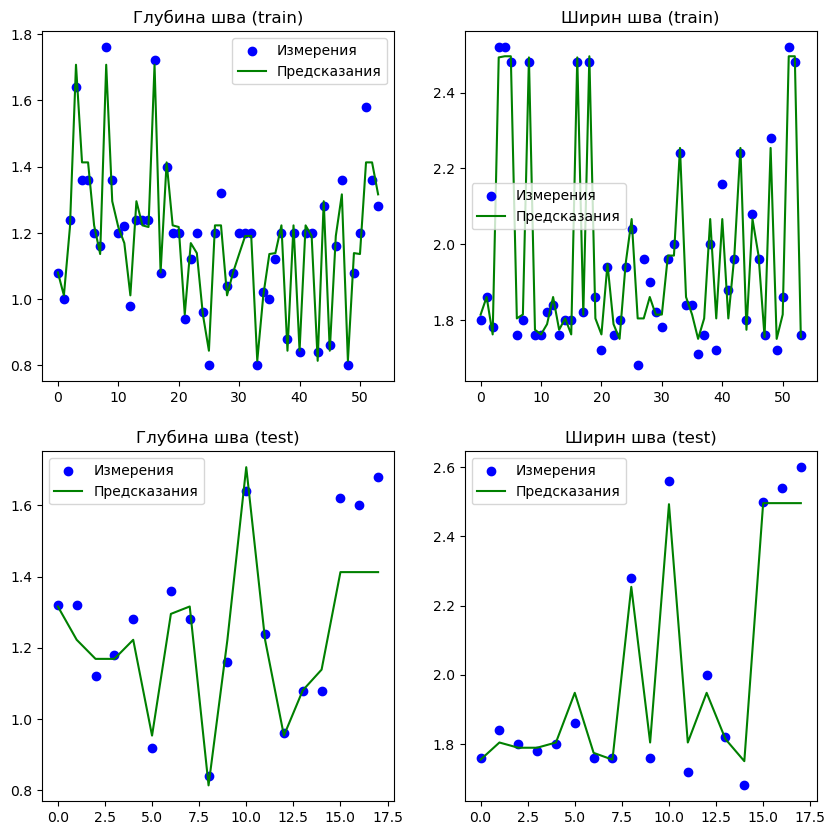

In [30]:
m = nreg_4
m.fit(x_train, y_train)
y_pred_train = m.predict(x_train)
y_pred_test = m.predict(x_test)
metrics['MLPRegressor (10,10)'] = out_metrics(y_train, y_test, y_pred_train, y_pred_test);

Изучаем поведение модели за пределами имеющегося диапазона значений


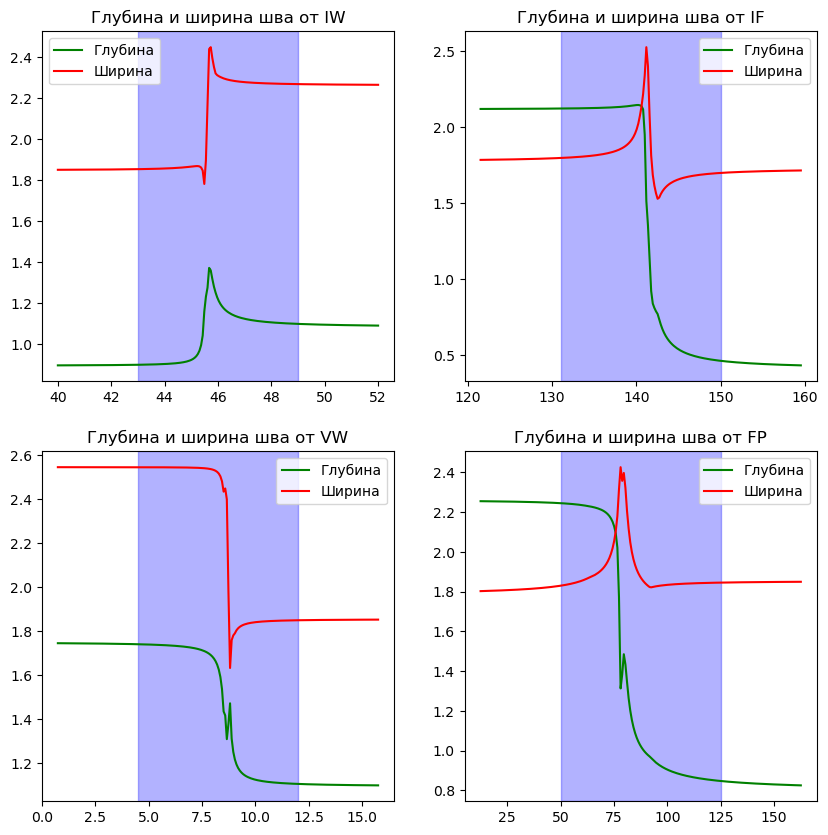

In [31]:
plot_extra(m, df)

__Вывод:__ Достаточно сложно подобрать оптимальные параметры сети. Соотношения работы сетей различной архитектуры изменяются случайным образом. Разумно подобрать параметры через GridSearchCV

### Поиск параметров сети через GridSearchCV <a class="anchor" id="chap3_3"></a>

In [32]:
from sklearn.model_selection import GridSearchCV
tp = make_pipeline(StandardScaler(),Normalizer())
Xn = tp.fit_transform(X)
parameters = {
    'hidden_layer_sizes' : [(4),(10),(10,10),(50,50),(10,10,10)],
    'tol': [1e-7, 1e-8, 1e-9],
    'early_stopping': [True,False]
}
gs = GridSearchCV(MLPRegressor(max_iter=50000, random_state=34), 
                  parameters, cv=3, n_jobs=1, scoring='neg_mean_squared_error')
gs.fit(Xn,y)
gs.best_params_

{'early_stopping': False, 'hidden_layer_sizes': (50, 50), 'tol': 1e-09}

In [45]:
nreg_gs = make_pipeline(StandardScaler(),Normalizer(),
                  MLPRegressor(hidden_layer_sizes=gs.best_params_['hidden_layer_sizes'],
                               max_iter=50000, 
                               tol=gs.best_params_['tol'], 
                               verbose=0,
                               early_stopping=gs.best_params_['early_stopping'],
                               random_state=34))

Для тренировочной выборки: MSE 0.0019756868860704466 - , MAE - 0.03184363819903852 , MAPE - 0.02197156793701222 
Для тестовой выборки: MSE 0.006322460322474401 - , MAE - 0.05309740913625136 , MAPE - 0.03384280052643238 


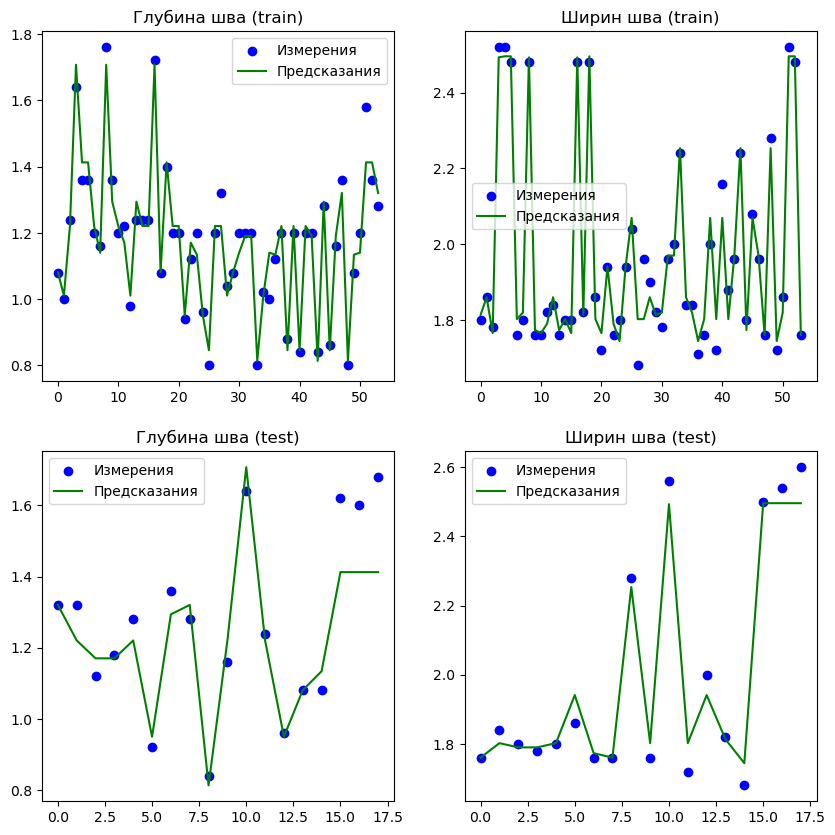

In [46]:
m = nreg_gs
m.fit(x_train, y_train)
y_pred_train = m.predict(x_train)
y_pred_test = m.predict(x_test)
metrics[f'MLPRegressor {gs.best_params_}'] = out_metrics(y_train, y_test, y_pred_train, y_pred_test);

Изучаем поведение модели за пределами имеющегося диапазона значений


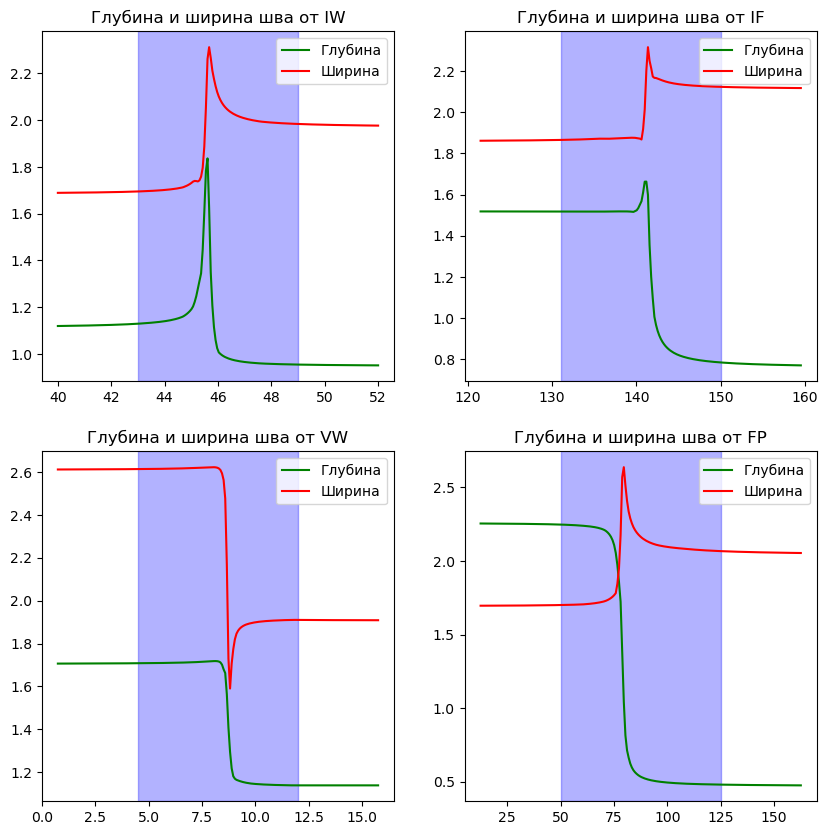

In [47]:
plot_extra(m, df)

[К содержанию](#toc)

###  Случайный лес  <a class="anchor" id="chap3_4"></a>

In [48]:
from sklearn.ensemble import RandomForestRegressor


In [49]:
rf = make_pipeline(StandardScaler(),Normalizer(),RandomForestRegressor())

Для тренировочной выборки: MSE 0.0020063184788843827 - , MAE - 0.03233890024584464 , MAPE - 0.02228301095103103 
Для тестовой выборки: MSE 0.0064435641318742985 - , MAE - 0.05355998180831499 , MAPE - 0.034050779194064 


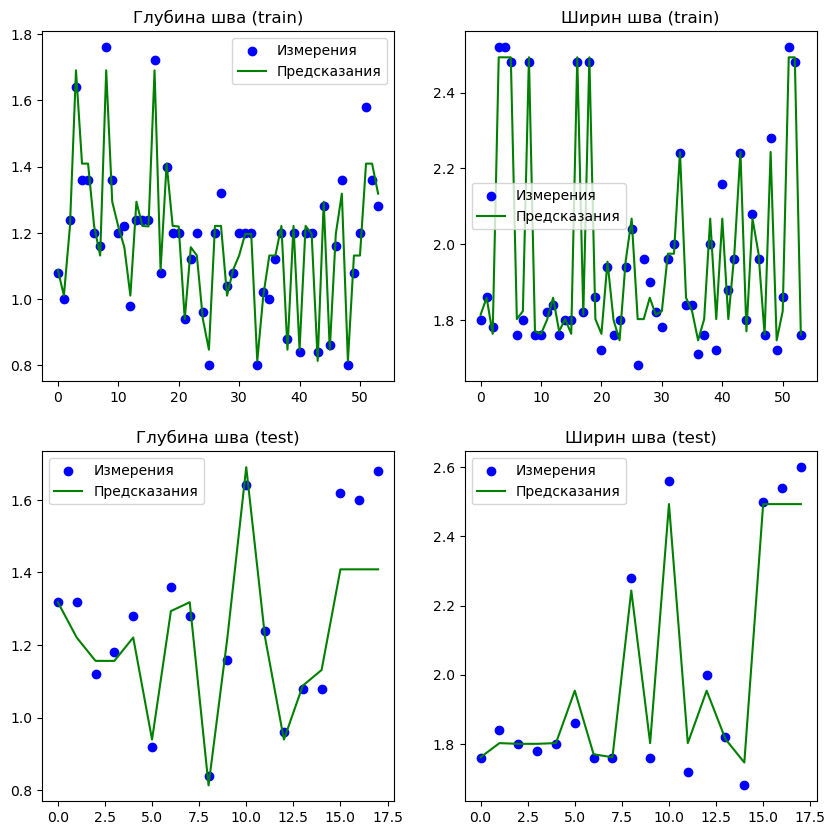

In [50]:
m = rf
m.fit(x_train, y_train)
y_pred_train = m.predict(x_train)
y_pred_test = m.predict(x_test)
metrics['RandomForestRegressor'] = out_metrics(y_train, y_test, y_pred_train, y_pred_test);

Изучаем поведение модели за пределами имеющегося диапазона значений


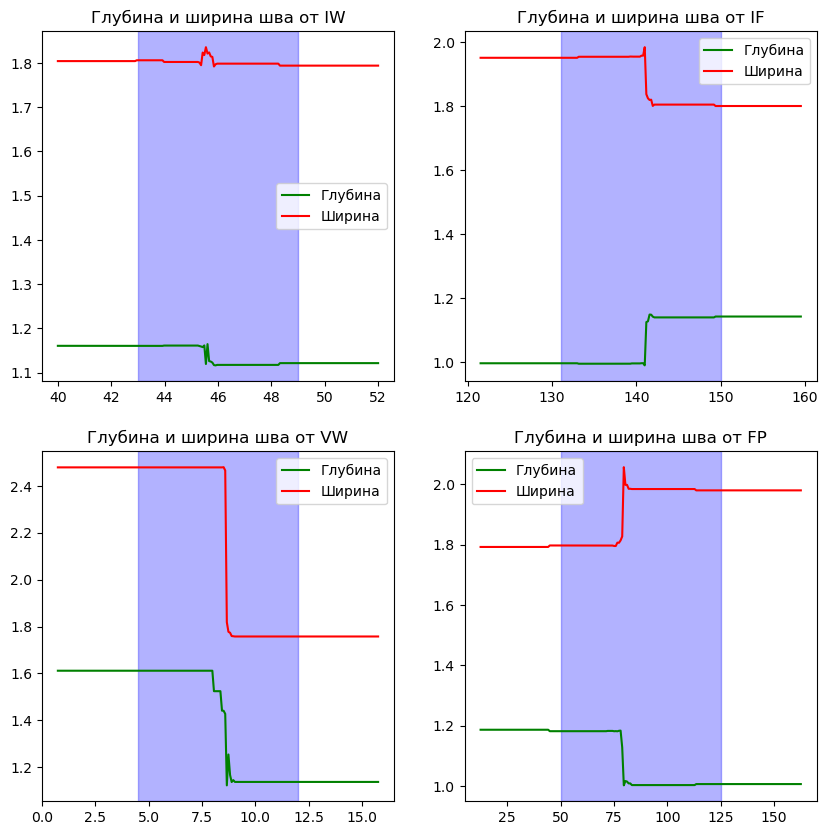

In [51]:
plot_extra(m, df)

### Сравнение полученных метрик  <a class="anchor" id="chap3_5"></a>

In [52]:
import numpy as np
labels = metrics.keys()
mse = []
mae = [] 
mape = []
df_m = pd.DataFrame(columns=('Method','Set','MSE','MAE','MAPE'))
for l in  labels:
    df_m.loc[df_m.size] = [l,'Train',metrics[l][0][0],metrics[l][0][1],metrics[l][0][2]]
    df_m.loc[df_m.size] = [l,'Test',metrics[l][1][0],metrics[l][1][1],metrics[l][1][2]]

In [53]:
df_m[df_m['Set']=='Test'].sort_values('MAE',ascending=True)

,Method,Set,MSE,MAE,MAPE
15,LinearRegression_poly_2,Test,0.006335,0.053083,0.033827
85,"MLPRegressor {'early_stopping': False, 'hidden...",Test,0.006322,0.053097,0.033843
35,LinearRegression_poly_8,Test,0.006229,0.053358,0.034200
25,LinearRegression_poly_3,Test,0.006360,0.053364,0.034020
95,RandomForestRegressor,Test,0.006444,0.053560,0.034051
75,"MLPRegressor (10,10)",Test,0.006354,0.053591,0.034149
55,MLPRegressor (10),Test,0.006605,0.054933,0.035054
5,LinearRegression,Test,0.006812,0.067977,0.042979
45,MLPRegressor (4),Test,0.007978,0.068773,0.048383
65,"MLPRegressor (4,4)",Test,0.009064,0.073759,0.048346


__Вывод__: все методы дают достаточно высокие и близкие результаты. Небольшие ошибки, полученные на тестовой выборке, близкие к ошибкам, полученным на тренировочной выборке, позволяют предполагать, что мполеученные модели не переобучены. 

Ранжирование результатов между разными моделями зависит от случайного разделения выборки на тестовую и тренировочную. Для получения стабильных результатов попробуем применить кросс-валидацию для подбора более эффективного метода. 

Также, в некоторых случаях были замечены ситуации, когда нейронные сети рассмотренных архитектур обучаются плохо. С разными сетями такая ситуация воспроизводилась случайным образом (видимо в даннойм случае есть локальные минимумы, в которые есть шанс найти). Для того, чтобы избежать такой ситуации в программе необходимо попробовать уменьшить скорость обучения или проводить несколько сессий обучения. 


[К содержанию](#toc)

## Проверяем полученные модели через кросс-валидацию  <a class="anchor" id="chap3_6"></a>

In [54]:
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.metrics import make_scorer

In [56]:
for score in ('r2','neg_mean_squared_error'):
    labels = enumerate(('LinearRegression','LinearRegression_poly_2', 'LinearRegression_poly_3',
                       'LinearRegression_poly_8','MLPRegressor (4)','MLPRegressor (10)','MLPRegressor (4,4)'
                      ,'MLPRegressor (10,10)',f'MLPRegressor {gs.best_params_}','RandomForest'))
    print(f"Scoring: {score}")
    for m in (linear1,linear_poly_2,linear_poly_3,linear_poly_8):
        print(f'{next(labels)[1]}: {cross_val_score(m, X, y, scoring=score).mean()}')
    for m in (nreg_1,nreg_2,nreg_3,nreg_4, nreg_gs):
        print(f'{next(labels)[1]}: {cross_val_score(m, X, y, scoring=score).mean()}') 
    print(f'{next(labels)[1]}: {cross_val_score(rf, X, y, scoring=score).mean()}') 

Scoring: r2
LinearRegression: 0.8294222805520345
LinearRegression_poly_2: 0.9291319724565298
LinearRegression_poly_3: 0.9291319724576965
LinearRegression_poly_8: 0.9285547435138632
MLPRegressor (4): 0.8172925436639673
MLPRegressor (10): 0.9284484065371041
MLPRegressor (4,4): 0.8984457956171721
MLPRegressor (10,10): 0.9287693955144561
MLPRegressor {'early_stopping': False, 'hidden_layer_sizes': (50, 50), 'tol': 1e-09}: 0.9291147308736276
RandomForest: 0.9252514046017444
Scoring: neg_mean_squared_error
LinearRegression: -0.008733277801165288
LinearRegression_poly_2: -0.0037262349639919853
LinearRegression_poly_3: -0.0037262349638889393
LinearRegression_poly_8: -0.0037512682927279785
MLPRegressor (4): -0.00871563609848799
MLPRegressor (10): -0.0037401674472310508
MLPRegressor (4,4): -0.005337225293225957
MLPRegressor (10,10): -0.003731077638389719
MLPRegressor {'early_stopping': False, 'hidden_layer_sizes': (50, 50), 'tol': 1e-09}: -0.003726965465278744
RandomForest: -0.003985379501643578

[К содержанию](#toc)

## Выводы по теоретической части <a class="anchor" id="chap4"></a>


   Для предсказания в диапазон заданных значений хорошую эффективность показывает и линейная регрессия, и нейронная сеть и случайный лес. Результат проверен кросс-валидацией и достаточно стабилен. 
   
   С точки зрения потребляемых ресурсов оптимальным для данной задачи является использование полиноминальной линейной регрессии со степенью 2 или 3.
    
   Однако, у нас достаточно мало точек для моделирования, поэтой имеет смысл дополнительно изучить обобщающую способность модели на более широком диапазоне значений. Для этих целей, для каждой модели были составлены графики экстраполяции с использованием  [Функции для изучения поведения модели за пределами заданных значений](#chap3_11). 

С использованием данной функции, последовательно:
 - значение одной из входных переменных задается массивом из 200 точек, равномерно распределенных от минимума параметра - 0,5 разброса параметра до максимума параметра + 0,5 разброса параметра
 - значения всех остальных входных переменных фиксируются средними значениями (проверялось также заполнение медианными, минимальными и максимальными значениями - без изменения основных наблюдаемых тенденций)
 - для данного набора, с использованием модели прогнозируются значения ширины и глубины сварного шва

На большинстве моделей можно наблюдать одинаковые тенденции:
 - при увеличении сварочного тока растет и ширина и глубина шва
 - при увеличении скорости сварки и ширина и глубина шва уменьшаются
 - при изменении тока фокусировки и расстоянии до образца происходит разнонаправленные изменеия ширины и глубины шва

В принципе, такие закономерности выглядят логично. 
  
   При этом, судя по графикам, модели линейной регрессии плохо объясняют процесс сварки в широком диапазоне значений. Значения ширины и глубины сварного быстро шва уходят в область отрицательных значений и явно не соответсвует физической сути изучаемого процесса. Процесс сварки связан с переходом фазовых состояний металлла, что позволяет ожидать наличие на графиках плавных участков и резких "скачков" Графики экстраполяции, полученные с использованием полносвязанных нейронных сети больше соответсвуют той картине, которую можно было бы ожидать в данном случае. 
  
 Зависимости, полученные с использованием сетей разных архитектур близкие, для примера рассмотрим графики, построенные с использованием сети с двумя скрытыми слоями по 50 нейронов, построенной по результатам с использованием GridSearchCV.

Изучаем поведение модели за пределами имеющегося диапазона значений


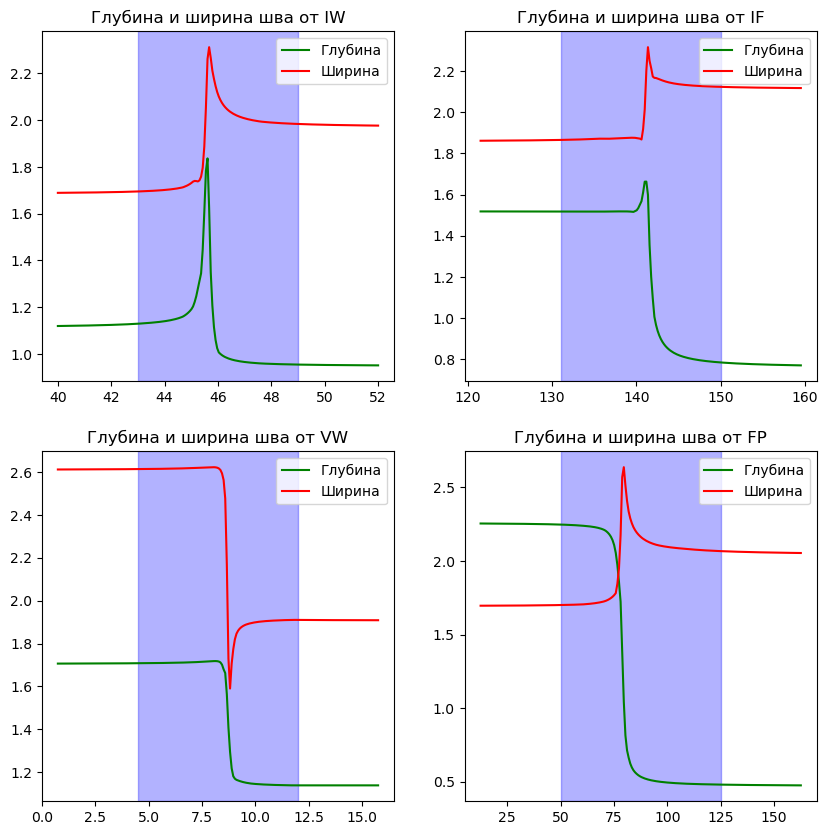

In [57]:
plot_extra(nreg_gs, df)

  На всех графиках мы видим наличие явно выраженного "пика" с резкими изменениями параметров и относительно "плоских" участков. При этому основные тенденции роста и убывания глубины и ширины сварного шва прослеживаются и соответсвуют предполагаемой картине. 
  
  Для того, чтобы делать обоснованные выводы относительно состоятельности полученных моделей за пределеми заданных измерений, необходимо провести анализ рещультатов с участием специалистов по процессу сварки и.или провести дополнительные контрольные измерения. 
  
__С учетом изложенного__ реализуем в приложении следующие модели:
  - полиноминальной линейной регрессии со степенью 3, эта модель должна с минимальными ресурсами, быстро строить прогноз но только вблизи значений, полученных экспериментальным путем. 
  - нейронную сеть с двумя слоями по 50 нейронов, можно предполагать, что эта модель будет давать осмысленные прогнозы в более широком диапазоне значений

[К содержанию](#toc)

## Описание программного решения <a class="anchor" id="chap5"></a>


В программе реализуем два класса: 
  - для работы с линейной регрессией с использованием методов библиотеки sklean
  - для работы с нейронной сетью с использование keras

Дополнительно использования классов сделаем реализацию для командной строки и web интерфейс с использованием flask. 

Параметры вызова командной строки:

__main.py__ __-method__ _метод расчета_ __-mode__ _режим работы_ __-data_file_path__ _имя файла с данными для обучения модели_
    
    -method - принимает два значения LinearRegression и MLPRegression, по-умолчанию - LinearRegression
    -mode - принимает два значения fit и predict, по умолчанию predict. Данные обученных моделей сохранябтся на диске ('lr_model' и 'MLP_model' соответственно) 
    -data_file_path - путь к файлу с данными  для переобучения модели, по умолчанию ./data/raw/ebw_data.csv

[К содержанию](#toc)